<a href="https://colab.research.google.com/github/Rajburande/Stock-price-prediction-using-ML/blob/main/23M0568_SOC_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# installing library for getting data
pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.5/73.5 kB 911.2 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.0/5.0 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.3/117.3 kB 14.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 91.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 kB 11.8 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.5-cp310-cp310-linux_x86_64.whl size=727806 sha256=263e4cc7396458b0c714c0cb1943e86304a17ffe5fc04d7c760df57f28b2837e
  Stored in directory: /root/.cache/pip/wheels/06/80/9b/98db0d58349a2f5c09f8406789ade4270762f97b7d26f2fa22
Successfully built peewee


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
import yfinance as yf

In [5]:
# Download stock data
ticker = 'AAPL'
stock_data = yf.download(ticker)
stock_data.to_csv('/content/stock_data.csv')

# Load data
data = pd.read_csv('/content/stock_data.csv')

data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
values = data['Close'].values.reshape(-1, 1)

# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_values = scaler.fit_transform(values)

# Create sequences for LSTM
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X,y = create_sequences(scaled_values, seq_length)

[*********************100%%**********************]  1 of 1 completed


In [6]:
X_test=X[-30:]
y_test=y[-30:]

In [7]:
X_train=X[:-30]
y_train=y[:-30]

In [8]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [9]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [10]:
history=model.fit(X_train, y_train, batch_size=1, epochs=10)


Epoch 1/10
10883/10883 [==============================] - 188s 17ms/step - loss: 4.7534e-04
Epoch 2/10
10883/10883 [==============================] - 185s 17ms/step - loss: 1.5490e-04
Epoch 3/10
10883/10883 [==============================] - 167s 15ms/step - loss: 1.0693e-04
Epoch 4/10
10883/10883 [==============================] - 181s 17ms/step - loss: 9.3969e-05
Epoch 5/10
10883/10883 [==============================] - 179s 16ms/step - loss: 7.5422e-05
Epoch 6/10
10883/10883 [==============================] - 177s 16ms/step - loss: 7.5267e-05
Epoch 7/10
10883/10883 [==============================] - 179s 16ms/step - loss: 7.2063e-05
Epoch 8/10
10883/10883 [==============================] - 179s 16ms/step - loss: 6.5167e-05
Epoch 9/10
10883/10883 [==============================] - 170s 16ms/step - loss: 6.6872e-05
Epoch 10/10
10883/10883 [==============================] - 170s 16ms/step - loss: 5.8477e-05


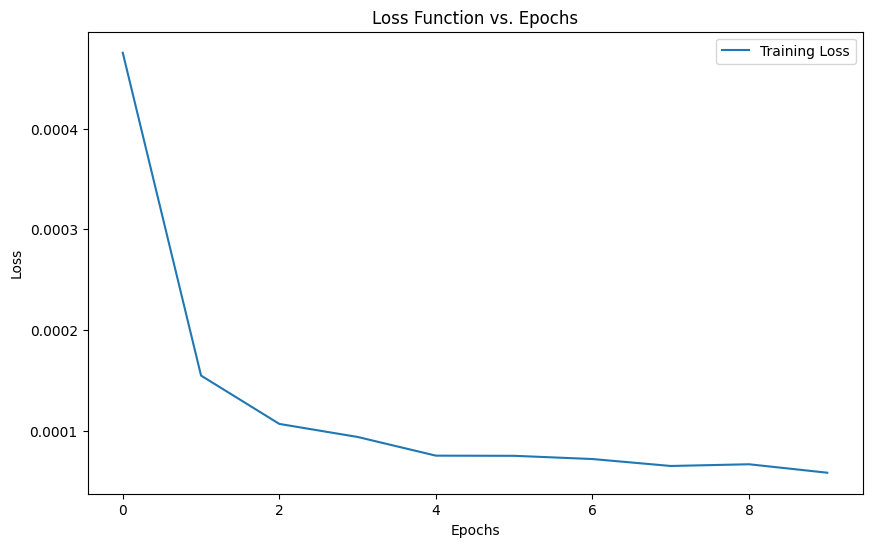

In [11]:
# Plot of Loss Functions against the Epochs
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.title('Loss Function vs. Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
# Make predictions
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

train = data[:len(X_train) + seq_length]
valid = data[len(X_train) + seq_length:]
valid['Predictions'] = predictions


# Comparing the Actual and Predicted Data
valid['Predictions'].compare(data['Close'].tail(30))

1/1 [==============================] - 1s 708ms/step


<ipython-input-12-352602fe7e40>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


,self,other
Date,,
2024-05-10,188.160019,183.050003
2024-05-13,185.864044,186.279999
2024-05-14,190.138031,187.429993
2024-05-15,189.762100,189.720001
2024-05-16,192.749863,189.839996
2024-05-17,192.193222,189.869995
2024-05-20,192.870956,191.039993
2024-05-21,193.982025,192.350006
2024-05-22,195.026337,190.899994


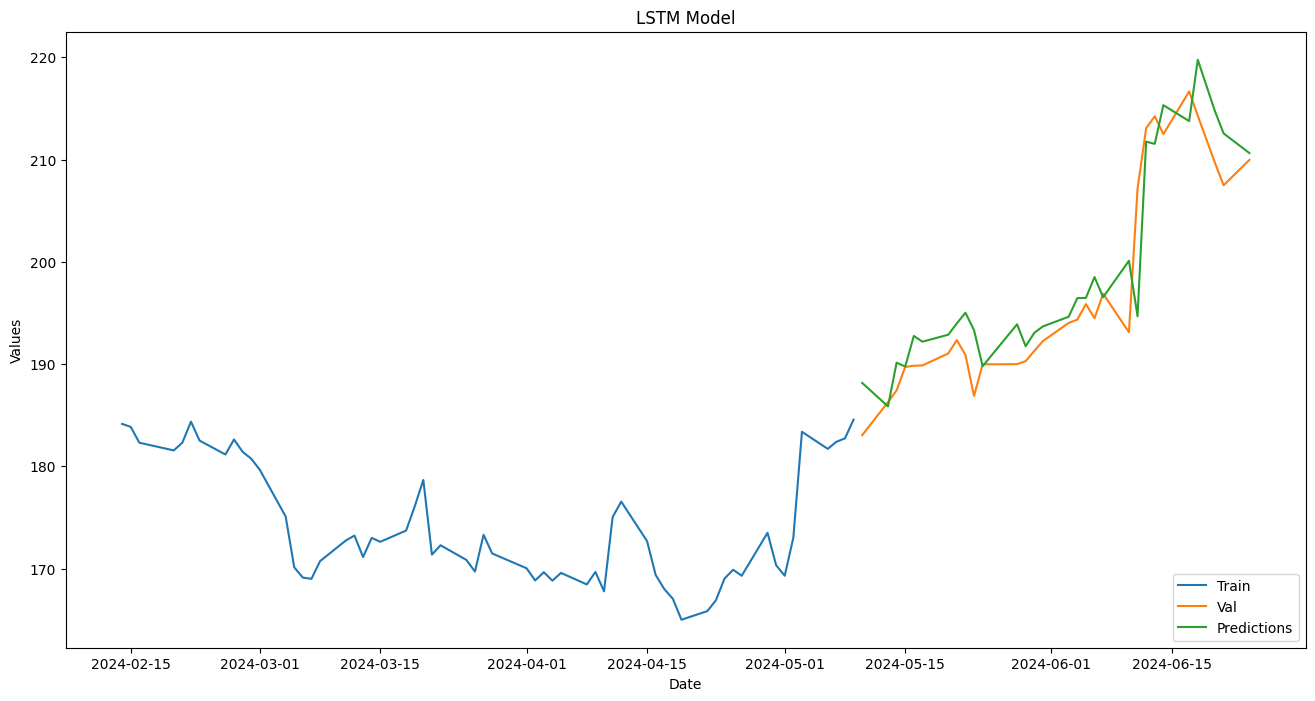

In [13]:
# Visualize the predictions
plt.figure(figsize=(16, 8))
plt.title('LSTM Model')
plt.xlabel('Date')
plt.ylabel('Values')
plt.plot(train.tail(60)['Close'])
plt.plot(valid.tail(60)[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()